In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

import datetime
import time
import dateutil

In [3]:
# Manually parse the file, since the format is ugly

# I worked on this previously:
# https://github.com/jradavenport/dst4l_2015/
# let's clean it up some...

def bat_parse(file):
    d = open(file, 'r')

    date = [] # this will be the list of dates
    dateraw = []
    chrg = []
    capac = []
    maxcap = []
    while True:
        # read in each line
        theline = d.readline().strip()
        if (len(theline) == 0):
            break

        # lines that have a date in them (don't start w/ '    |')
        if (theline[0] != '|'):
            x = dateutil.parser.parse(theline).timetuple()
            dateraw.append(theline)
            date.append(time.mktime(x)/60./60./24.)

        if theline[0] == '|':
            sep = theline.split("\"")
            if sep[1][0:6].lower() == 'maxcap':
                capac.append(float(sep[2].split(' ')[2]))
            if sep[1][0:10].lower() == 'currentcap':
                chrg.append(float(sep[2].split(' ')[2]))
            if sep[1][0:10].lower() == 'designcapa':
                maxcap.append(float(sep[2].split(' ')[2]))

    d.close()
    
    return date, dateraw, chrg, capac, maxcap

In [5]:
file = '../data/batlog_fuji.dat'
date, dateraw, chrg, capac, maxcap = bat_parse(file)

# convert these lists into numpy arrays for easier manipulating
charge0 = np.array(chrg, dtype='float')
capacity0 = np.array(capac, dtype='float')
day0 = np.array(date, dtype='float')
timeofday0 = ((day0-7/24.) % 1)*24
mcap0 = np.array(maxcap, dtype='float')


/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


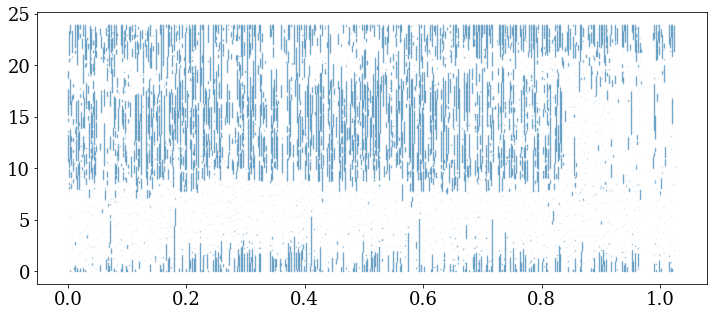

In [6]:
plt.figure(figsize=(12,5))
plt.scatter((day0 - day0.min())/365., timeofday0, marker='.', s=1, alpha=0.1)

In [7]:
file = '../data/batlog_braeburn.dat'
date, dateraw, chrg, capac, maxcap = bat_parse(file)

# convert these lists into numpy arrays for easier manipulating
charge1 = np.array(chrg, dtype='float')
capacity1 = np.array(capac, dtype='float')
day1 = np.array(date, dtype='float')
timeofday1 = ((day1-7/24.) % 1)*24
mcap1 = np.array(maxcap, dtype='float')


/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname MST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTim

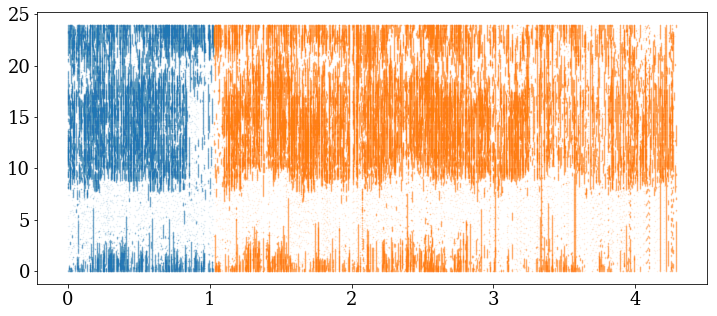

In [8]:
plt.figure(figsize=(12,5))
plt.scatter((day0 - day0.min())/365., timeofday0, marker='.', s=1, alpha=0.1)
plt.scatter((day1 - day0.min())/365., timeofday1, marker='.', s=1, alpha=0.1)

In [10]:
# this is the LIVE version on this computer
file = '/Users/james/batlog.dat'
date, dateraw, chrg, capac, maxcap = bat_parse(file)

# convert these lists into numpy arrays for easier manipulating
charge2 = np.array(chrg, dtype='float')
capacity2 = np.array(capac, dtype='float')
day2 = np.array(date, dtype='float')
timeofday2 = ((day2-7/24.) % 1)*24
mcap2 = np.array(maxcap, dtype='float')



/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
/anaconda3/lib/python3.7/site-packages/dateutil/parser/_parser.py:1206: UnknownTimezoneWarning: tzname CDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


# Six Years of Data

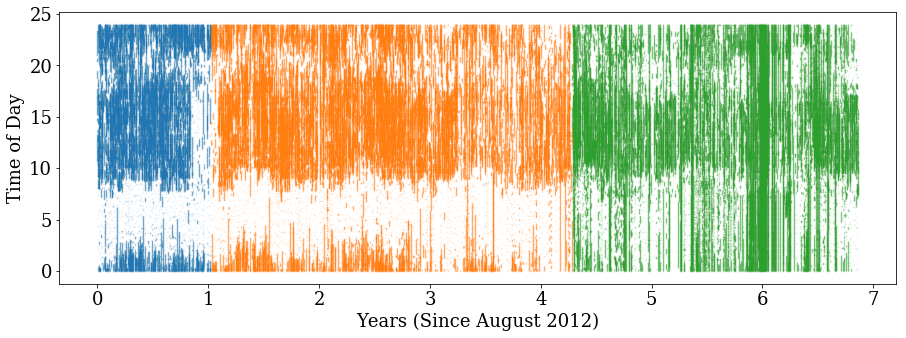

In [109]:
plt.figure(figsize=(15,5))
plt.scatter((day0 - day0.min())/365.25, timeofday0, marker='.', s=1, alpha=0.1)
plt.scatter((day1 - day0.min())/365.25, timeofday1, marker='.', s=1, alpha=0.1)
plt.scatter((day2 - day0.min())/365.25, timeofday2, marker='.', s=1, alpha=0.1)

plt.xlabel('Years (Since August 2012)')
plt.ylabel('Time of Day')
plt.savefig('time_vs_year.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

Text(0, 0.5, 'Time of Day')

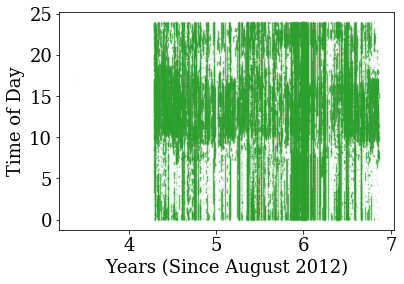

In [20]:
plt.scatter((day2 - day0.min())/365.25, timeofday2, marker='.', s=1, alpha=0.1, c='C2')
plt.xlabel('Years (Since August 2012)')
plt.ylabel('Time of Day')

## Anomalies in the 2016MBP

(17700, 17790)

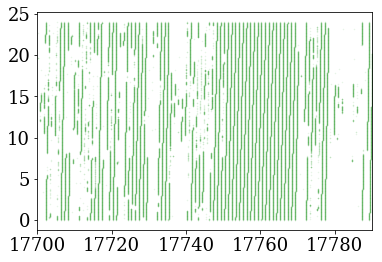

In [22]:
plt.scatter(day2, timeofday2, marker='.', s=1, alpha=0.1, c='C2')

# plt.xlim(5.8,6.3)
plt.xlim(17700,17790)

(0.927, 0.933)

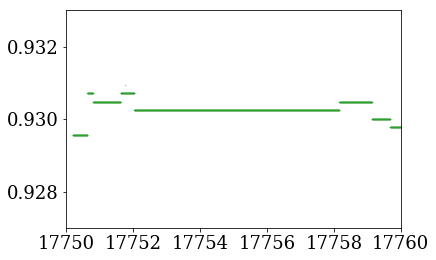

In [59]:
plt.scatter((day2[0:mcap2.size]), capacity2/mcap2, marker='.', s=1, alpha=0.1, c='C2')
plt.xlim(17750,17760)
plt.ylim(.927,.933)

In [62]:
sum((day2[0:mcap2.size] > 17753) & (day2[0:mcap2.size] <= 17754))

1440

this looks like **every** minute of data is being saved, and its being saved for nearly constant values.... so that's clearly junk

one solution would be to drop any days w/ more than 1k entries

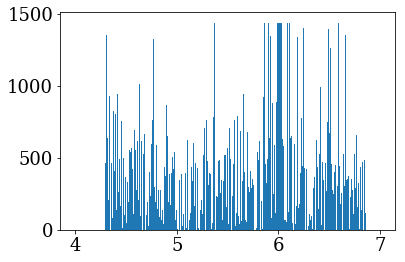

In [63]:
_ = plt.hist((day2[0:mcap2.size] - day0.min())/365., bins=np.arange(4,7,1/365.25))

In [87]:
days2 = np.array(np.floor(day2[0:mcap2.size]), dtype=np.int)

# plt.plot(np.bincount(days2))
# plt.xlim(17000,18000)

good = np.arange(0, np.size(np.bincount(days2)), 1)[np.where((np.bincount(days2) < 800))[0]]
gooddays = np.isin(days2[0:mcap2.size], good)


(17700, 17790)

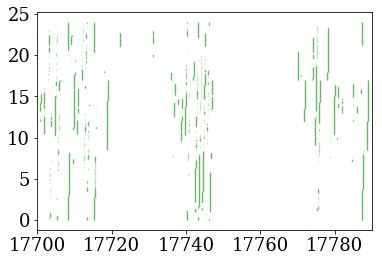

In [88]:
plt.scatter(day2[0:mcap2.size][gooddays], timeofday2[0:mcap2.size][gooddays], marker='.', s=1, alpha=0.1, c='C2')

plt.xlim(17700,17790)

Text(0, 0.5, 'Time of Day')

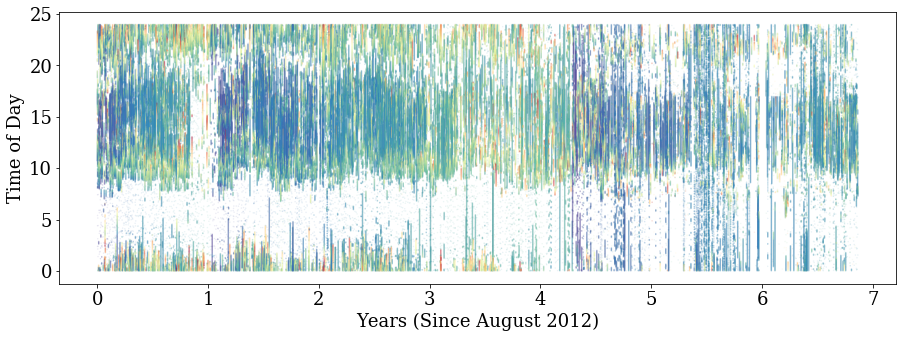

In [89]:
plt.figure(figsize=(15,5))
plt.scatter((day0[0:mcap0.size] - day0.min())/365., timeofday0[0:mcap0.size], marker='.', s=1, alpha=0.1, 
            c=charge0[0:mcap0.size], cmap=plt.cm.Spectral)
plt.scatter((day1[0:mcap1.size] - day0.min())/365., timeofday1[0:mcap1.size], marker='.', s=1, alpha=0.1,
            c=charge1[0:mcap1.size], cmap=plt.cm.Spectral)
plt.scatter((day2[0:mcap2.size][gooddays] - day0.min())/365., timeofday2[0:mcap2.size][gooddays], 
            marker='.', s=1, alpha=0.1, c=charge2[0:mcap2.size][gooddays], cmap=plt.cm.Spectral)

plt.xlabel('Years (Since August 2012)')
plt.ylabel('Time of Day')

Text(0, 0.5, 'Time of Day')

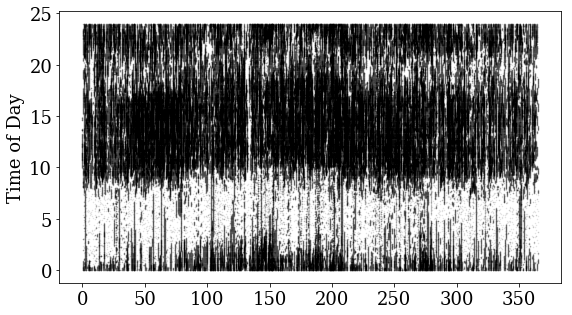

In [126]:
plt.figure(figsize=(9,5))
plt.scatter((day0[0:mcap0.size] - day0.min()) % 365.2422, timeofday0[0:mcap0.size], marker='.', s=1, alpha=0.1, 
            c='k')
plt.scatter((day1[0:mcap1.size] - day0.min()) % 365.2422, timeofday1[0:mcap1.size], marker='.', s=1, alpha=0.1,
            c='k')
plt.scatter((day2[0:mcap2.size][gooddays] - day0.min()) % 365.2422, timeofday2[0:mcap2.size][gooddays], 
            marker='.', s=1, alpha=0.1, c='k')

# plt.xlabel('Years (Since August 2012)')
plt.ylabel('Time of Day')

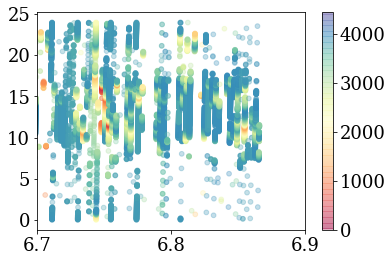

In [35]:
plt.scatter((day2[0:mcap2.size] - day0.min())/365., timeofday2[0:mcap2.size], marker='.', s=90, alpha=0.3, 
            c=charge2[0:mcap2.size], cmap=plt.cm.Spectral)

plt.xlim(6.7,6.9)
plt.colorbar()

# Battery Decay Over Time

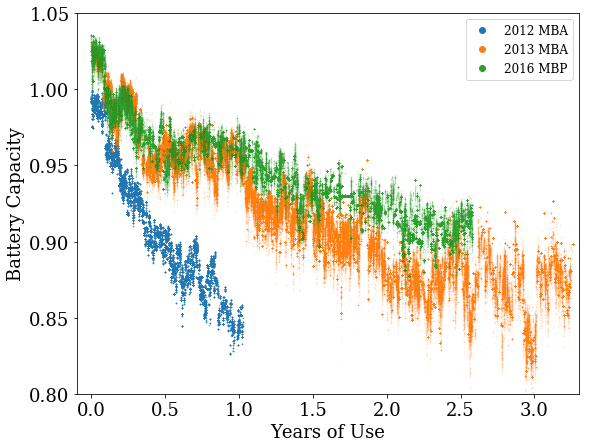

In [130]:
plt.figure(figsize=(9,7))
plt.scatter((day0[0:mcap0.size] - day0[1])/365., capacity0[0:mcap0.size]/mcap0, marker='.', s=1, alpha=0.1)
plt.scatter((day1[0:mcap1.size] - day1[1])/365., capacity1/mcap1, marker='.', s=1, alpha=0.1)
plt.scatter((day2[0:mcap2.size] - day2[1])/365., capacity2/mcap2, marker='.', s=1, alpha=0.1)

plt.plot([],[], 'o', label='2012 MBA', c='C0')
plt.plot([],[], 'o', label='2013 MBA', c='C1')
plt.plot([],[], 'o', label='2016 MBP', c='C2')
plt.legend(fontsize=12)

plt.xlim(-0.1, 3.3)
plt.ylim(0.8,1.05)
plt.ylabel('Battery Capacity')
plt.xlabel('Years of Use')
plt.savefig('bat_decay.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

# Discharge over Time

Text(0.5, 0, 'Years of Use')

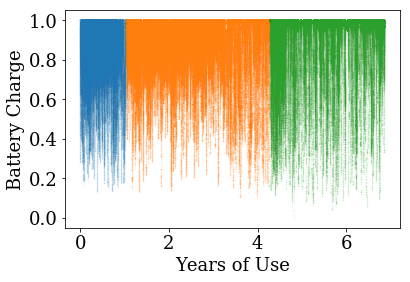

In [17]:

plt.scatter((day0[0:mcap0.size] - day0[1])/365., charge0[0:mcap0.size]/capacity0[0:mcap0.size], 
            marker='.', s=1, alpha=0.1)
plt.scatter((day1[0:mcap1.size] - day0[1])/365., charge1/capacity1, marker='.', s=1, alpha=0.1)
plt.scatter((day2[0:mcap2.size] - day0[1])/365., charge2/capacity2, marker='.', s=1, alpha=0.1)
plt.ylabel('Battery Charge')
plt.xlabel('Years of Use')

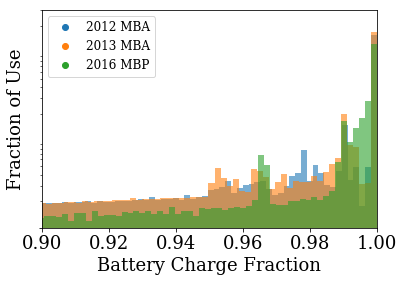

In [133]:
_ = plt.hist(charge0/capacity0, bins=500, alpha=0.6, normed=True)
_ = plt.hist(charge1/capacity1, bins=500, alpha=0.6, normed=True)
_ = plt.hist(charge2[0:50000]/capacity2[0:50000], bins=500, alpha=0.6, normed=True)
plt.xlabel('Battery Charge Fraction')
plt.ylabel('Fraction of Use')
plt.yscale('log')
plt.yticks([1],[' '])

plt.plot([],[], 'o', label='2012 MBA', c='C0')
plt.plot([],[], 'o', label='2013 MBA', c='C1')
plt.plot([],[], 'o', label='2016 MBP', c='C2')
plt.legend(fontsize=12, loc=2)

plt.xlim(0.9,1)
plt.ylim(1,3e2)
plt.savefig('charge_frac_hist.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

# Predicting Discharge Rate?
This is a feature Apple removed a couple years ago, which mildly annoys me. So, given this much history of charge/discharge, can we learn the discharge profile and predict time to empty?

(13.125, 13.24)

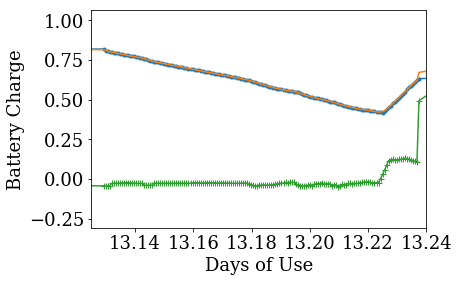

In [39]:
plt.plot((day2[0:10000] - day2[1]), charge2[0:10000]/capacity2[0:10000], '-o', markersize=3)

smo = pd.Series(charge2[0:10000]/capacity2[0:10000]).rolling(window=5, center=True).mean()

plt.plot((day2[0:10000] - day2[1]),smo)
plt.plot((day2[0:10000] - day2[1]), smo.diff(periods=1)*10, '-+')

plt.ylabel('Battery Charge')
plt.xlabel('Days of Use')

plt.xlim(13.125,13.24)

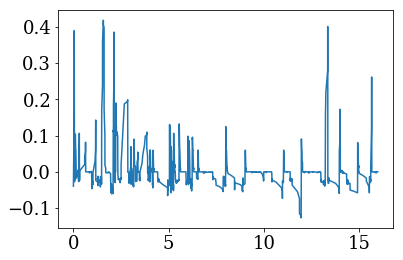

In [42]:
plt.plot((day2[0:10000] - day2[1]), smo.diff(periods=10))

# Laptop Use

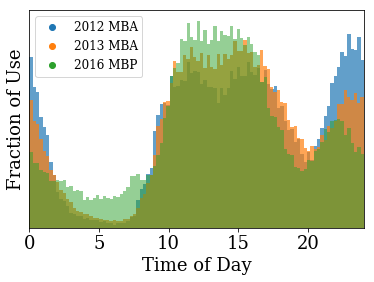

In [131]:
_ = plt.hist(timeofday0, bins=100, alpha=0.7, normed=True)
_ = plt.hist(timeofday1, bins=100, alpha=0.7, normed=True)
_ = plt.hist(timeofday2[0:mcap2.size][gooddays], bins=100, alpha=0.5, normed=True)

plt.plot([],[], 'o', label='2012 MBA', c='C0')
plt.plot([],[], 'o', label='2013 MBA', c='C1')
plt.plot([],[], 'o', label='2016 MBP', c='C2')
plt.legend(fontsize=12)

plt.ylabel('Fraction of Use')
plt.yticks([1],[' '])
plt.xlabel('Time of Day')
plt.xlim(0,24)
plt.savefig('timeofday.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

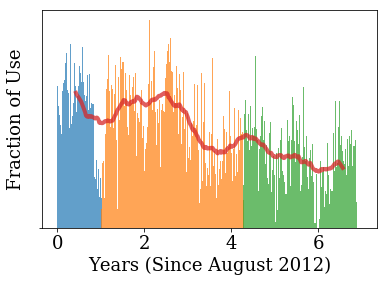

In [119]:
n1,b1,_ = plt.hist((day0 - day0.min())/365., alpha=0.7, bins=np.arange(0,7,7/365.25))
n2,b2,_ = plt.hist((day1 - day0.min())/365., alpha=0.7, bins=np.arange(0,7,7/365.25))
n3,b3,_ = plt.hist((day2[0:mcap2.size][gooddays] - day0.min())/365., alpha=0.7, bins=np.arange(0,7,7/365.25))

bins = (b1[1:]+b1[0:-1])/2.
smo = pd.Series(n1+n2+n3).rolling(window=45, center=True).mean()
plt.plot(bins, smo, lw=4, alpha=0.75)

plt.ylabel('Fraction of Use')
plt.yticks([1],[' '])
plt.xlabel('Years (Since August 2012)')
plt.savefig('years.png',dpi=350, bbox_inches='tight', pad_inches=0.25)

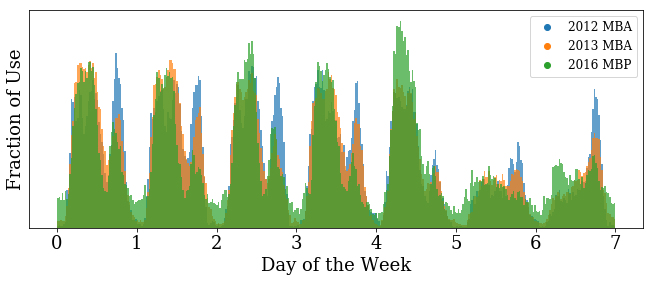

In [132]:
plt.figure(figsize=(11,4))
_ = plt.hist((day0 -4.5) % 7, alpha=0.7, bins=np.arange(0,7,7/365.25), normed=True)
_ = plt.hist((day1  -4.5) % 7, alpha=0.7, bins=np.arange(0,7,7/365.25), normed=True)
_ = plt.hist((day2[0:mcap2.size][gooddays] -4.5 ) % 7, alpha=0.7, bins=np.arange(0,7,7/365.25), 
             normed=True)

plt.plot([],[], 'o', label='2012 MBA', c='C0')
plt.plot([],[], 'o', label='2013 MBA', c='C1')
plt.plot([],[], 'o', label='2016 MBP', c='C2')
plt.legend(fontsize=12)


plt.ylabel('Fraction of Use')
plt.yticks([1],[' '])
plt.xlabel('Day of the Week')

plt.savefig('dayofweek.png',dpi=350, bbox_inches='tight', pad_inches=0.25)